In [1]:
#Read and Plot the RBSP L4 density data from http://emfisis.physics.uiowa.edu/Flight/
import os
import glob
import time
import datetime
import calendar as cal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from spacepy import pycdf

In [2]:
pathname='./L4_Data/'
filename_start = 'rbsp-a_density_emfisis-L4_'
filename_end = '.cdf'
datestr = '20190701'
filename_wild = filename_start + datestr + '*' + filename_end
filename = glob.glob( pathname + filename_wild )

In [3]:
filename

['./L4_Data/rbsp-a_density_emfisis-L4_20190701_v1.5.16.cdf']

In [4]:
filename = filename[0].replace(pathname, '')
fullpath_filename = pathname + filename

In [5]:
fullpath_filename

'./L4_Data/rbsp-a_density_emfisis-L4_20190701_v1.5.16.cdf'

In [6]:
data = pycdf.CDF(fullpath_filename)

In [7]:
data

<CDF:
Epoch: CDF_TIME_TT2000 [10317]
bmag: CDF_FLOAT [10317]
density: CDF_REAL4 [10317]
digi_type: CDF_CHAR*10 [10317]
fce: CDF_REAL4 [10317]
fpe: CDF_REAL4 [10317]
fuh: CDF_REAL4 [10317]
wpe_over_wce: CDF_REAL4 [10317]
y: CDF_FLOAT [10317]
>

In [8]:
ne = pd.DataFrame( data['Epoch'][:], columns=['UT'])

In [9]:
ne['timestamp'] = ne['UT'].apply( lambda x: cal.timegm(x.timetuple()) )

In [10]:
ne['bmag'] = data['bmag'][:]

In [11]:
ne['density'] = data['density'][:]

In [12]:
min(ne['density'])

6.105899810791016

/Users/dedong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


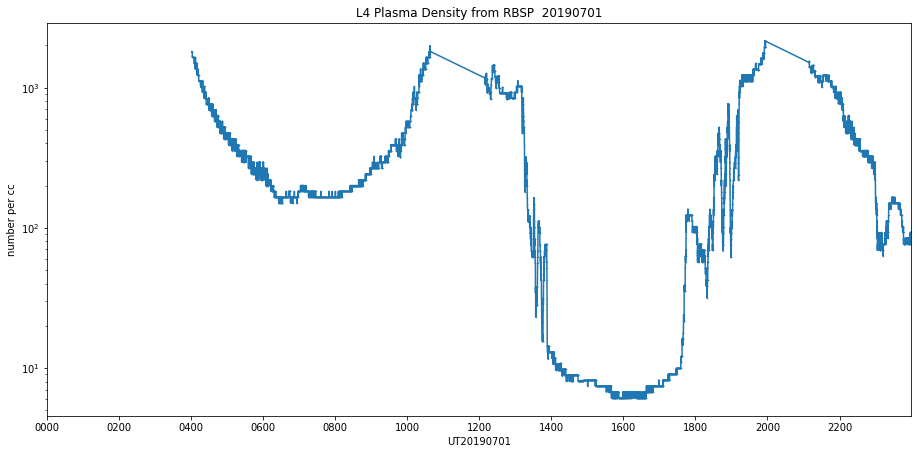

In [13]:
title = 'L4 Plasma Density from RBSP' + '  ' + datestr
xlim = [ datetime.datetime(2019, 7, 1, 0, 0, 0, 0), datetime.datetime(2019, 7, 1, 23, 59, 0, 0) ]
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.15)
hours = mdates.HourLocator(interval=2)
hoursFmt = mdates.DateFormatter('%H%M')

ax1 = plt.subplot(211)
plt.plot(ne['UT'], ne['density'], linestyle='-', marker='o', markersize=0.3)
plt.xlim(xlim)
#plt.ylim([-1000, 2500])
hoursFmt = mdates.DateFormatter('%H%M')
ax1.xaxis.set_major_locator(hours)
ax1.xaxis.set_major_formatter(hoursFmt)
ax1.set_ylabel('number per cc')
ax1.set_title(title)
ax1.set_xlabel('UT'   + datestr)
ax1.set_yscale('log')
plt.show()